In [1]:
import glob
import pandas as pd
import numpy as np

import os
import re

In [5]:
attack = "crownibp"

In [10]:
results_folder = rf"results\{attack}"

In [11]:
algorithms = ["baseline","noise","fgsm","pgd","crownibp"]

In [12]:
# CI , IBS , NegLL
metric = "CI"

In [13]:
ascending = False if metric=="CI" else True

 # aggregate all the CI files
os.listdir(results_folder)
excels = []
for folder in os.listdir(results_folder):
    glob_search = os.path.join(results_folder,folder,"*",f"{metric}.xlsx")
    excels.extend(glob.glob(glob_search))

In [14]:
df = pd.DataFrame()
N_datasets = len(excels)
percentage_change = []
for excel_i in excels:

    temp_df = pd.read_excel(excel_i)
    folder_name,dataset_name = excel_i.split("\\")[-3:-1]
    temp_df.columns = ["eps"] + temp_df.columns[1:].to_list()
    col_name = (dataset_name,re.sub("results_","",folder_name))
    df[col_name] = temp_df[f"Robust {metric}"] #temp_df["Non Robust CI"].round(3).astype(str) + " / " + temp_df["Robust CI"].round(3).astype(str)

    col_name = (dataset_name,"baseline")
    df[col_name] = temp_df[f"Non Robust {metric}"]

df.index = temp_df.eps

In [15]:
micolumns = pd.MultiIndex.from_tuples(df.columns)
dfmi = (
    pd.DataFrame(
        df.values,
        index=df.index,
        columns=micolumns,
    )
    .sort_index()
    .sort_index(axis=1)
)

dfmi.sort_values(by="eps",ascending=False,inplace=True)
dfmi = dfmi.reindex(columns=algorithms, level=1)


In [16]:
dfmi[dfmi==''] = np.NaN
dfmi = dfmi.astype(float)
dfmi

Aids2                                          Dialysis            \
      baseline     noise      fgsm       pgd  crownibp  baseline     noise   
eps                                                                          
2.00  0.501248  0.495484  0.494656  0.492779  0.523921  0.510804       NaN   
1.00  0.498971  0.493960  0.498366  0.494198  0.565189  0.573448  0.456030   
0.80  0.501181  0.498066  0.498419  0.495908  0.575802  0.611460  0.489340   
0.70  0.505020  0.498943  0.497428  0.497142  0.577945  0.633310  0.512468   
0.60  0.507135  0.500638  0.499967  0.498476  0.578355  0.656125  0.539425   
0.50  0.509117  0.502582  0.502486  0.501562  0.578431  0.676549  0.568678   
0.10  0.573373  0.556668  0.557159  0.556025  0.579546  0.717119  0.693833   
0.07  0.573006  0.555653  0.555611  0.555263  0.579298  0.716901  0.701352   
0.05  0.572634  0.554629  0.554968  0.554658  0.579127  0.716915  0.704067   
0.00  0.572115  0.553300  0.552815  0.553520  0.579317  0.716876  0.707112   

                                    ...   divorce                      \
          fgsm       pgd  crownibp  ...  baseline     noise      fgsm   
eps                                 ...                                 
2.00  0.535617  0.441054  0.369437  ...  0.492944  0.504557  0.455560   
1.00  0.633858  0.533865  0.526261  ...  0.504835  0.508912  0.458136   
0.80  0.657109  0.570898  0.586330  ...  0.505703  0.510009  0.455735   
0.70  0.667329  0.590422  0.618569  ...  0.510642  0.513191  0.478465   
0.60  0.675903  0.611362  0.648093  ...  0.513693  0.514009  0.497937   
0.50  0.684750  0.633247  0.670986  ...  0.522392  0.515810  0.524018   
0.10  0.709708  0.708731  0.694363  ...  0.536276  0.536614  0.540347   
0.07  0.711994  0.714024  0.694528  ...  0.534868  0.539234  0.542977   
0.05  0.713304  0.715176  0.694598  ...  0.536914  0.539190  0.540009   
0.00  0.713821  0.716904  0.695202  ...  0.539283  0.536096  0.542726   

                          prostate                                          
           pgd  crownibp  baseline     noise      fgsm       pgd  crownibp  
eps                                                                         
2.00  0.478525  0.503858  0.384951  0.453398  0.479126  0.456068  0.469417  
1.00  0.485150  0.518151  0.411650  0.498544  0.521845  0.501456  0.575000  
0.80  0.494526  0.518577  0.426456  0.522330  0.536650  0.522330  0.598058  
0.70  0.510091  0.516258  0.446602  0.531068  0.542476  0.529126  0.600000  
0.60  0.526911  0.518621  0.463107  0.538592  0.547087  0.531796  0.607767  
0.50  0.547769  0.520056  0.490049  0.545874  0.552913  0.542476  0.631796  
0.10  0.538939  0.518681  0.635194  0.571117  0.593447  0.587621  0.640534  
0.07  0.534464  0.520318  0.636893  0.573301  0.593447  0.588107  0.641505  
0.05  0.534295  0.521890  0.639078  0.577184  0.593204  0.589078  0.641505  
0.00  0.532630  0.519123  0.643204  0.575485  0.593204  0.595631  0.643689  

[10 rows x 35 columns]

In [52]:
# dfmi.T.groupby(axis=0,level=0).rank(axis=0,na_option='bottom',method="average",ascending=ascending)

In [17]:
best_per_dataset_rank = dfmi.groupby(level=0,axis=1).rank(axis=0,na_option='bottom',method="average",ascending=ascending)
best_per_dataset_rank

C:\Users\lpott\AppData\Local\Temp\ipykernel_22840\996602392.py:1: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  best_per_dataset_rank = dfmi.groupby(level=0,axis=1).rank(axis=0,na_option='bottom',method="average",ascending=ascending)
C:\Users\lpott\AppData\Local\Temp\ipykernel_22840\996602392.py:1: FutureWarning: The 'axis' keyword in DataFrameGroupBy.rank is deprecated and will be removed in a future version. Call without passing 'axis' instead.
  best_per_dataset_rank = dfmi.groupby(level=0,axis=1).rank(axis=0,na_option='bottom',method="average",ascending=ascending)


Aids2                          Dialysis                           ...  \
     baseline noise fgsm  pgd crownibp baseline noise fgsm  pgd crownibp  ...   
eps                                                                       ...   
2.00      2.0   3.0  4.0  5.0      1.0      2.0   5.0  1.0  3.0      4.0  ...   
1.00      2.0   5.0  3.0  4.0      1.0      2.0   5.0  1.0  3.0      4.0  ...   
0.80      2.0   4.0  3.0  5.0      1.0      2.0   5.0  1.0  4.0      3.0  ...   
0.70      2.0   3.0  4.0  5.0      1.0      2.0   5.0  1.0  4.0      3.0  ...   
0.60      2.0   3.0  4.0  5.0      1.0      2.0   5.0  1.0  4.0      3.0  ...   
0.50      2.0   3.0  4.0  5.0      1.0      2.0   5.0  1.0  4.0      3.0  ...   
0.10      2.0   4.0  3.0  5.0      1.0      1.0   5.0  2.0  3.0      4.0  ...   
0.07      2.0   3.0  4.0  5.0      1.0      1.0   4.0  3.0  2.0      5.0  ...   
0.05      2.0   5.0  3.0  4.0      1.0      1.0   4.0  3.0  2.0      5.0  ...   
0.00      2.0   4.0  5.0  3.0      1.0      2.0   4.0  3.0  1.0      5.0  ...   

      divorce                          prostate                           
     baseline noise fgsm  pgd crownibp baseline noise fgsm  pgd crownibp  
eps                                                                       
2.00      3.0   1.0  5.0  4.0      2.0      5.0   4.0  1.0  3.0      2.0  
1.00      3.0   2.0  5.0  4.0      1.0      5.0   4.0  2.0  3.0      1.0  
0.80      3.0   2.0  5.0  4.0      1.0      5.0   3.5  2.0  3.5      1.0  
0.70      3.0   2.0  5.0  4.0      1.0      5.0   3.0  2.0  4.0      1.0  
0.60      4.0   3.0  5.0  1.0      2.0      5.0   3.0  2.0  4.0      1.0  
0.50      3.0   5.0  2.0  1.0      4.0      5.0   3.0  2.0  4.0      1.0  
0.10      4.0   3.0  1.0  2.0      5.0      2.0   5.0  3.0  4.0      1.0  
0.07      3.0   2.0  1.0  4.0      5.0      2.0   5.0  3.0  4.0      1.0  
0.05      3.0   2.0  1.0  4.0      5.0      2.0   5.0  3.0  4.0      1.0  
0.00      2.0   3.0  1.0  4.0      5.0      2.0   5.0  4.0  3.0      1.0  

[10 rows x 35 columns]

In [18]:
best_per_dataset_avg_rank = best_per_dataset_rank.stack(level=1).mean(1).unstack(1).sort_values(by="eps",ascending=False)
best_per_dataset_avg_rank

baseline     noise      fgsm       pgd  crownibp
eps                                                   
2.00  3.142857  3.000000  3.142857  3.571429  2.142857
1.00  3.142857  3.285714  3.571429  3.571429  1.428571
0.80  2.857143  3.357143  3.571429  3.928571  1.285714
0.70  2.857143  3.142857  3.714286  4.000000  1.285714
0.60  2.857143  3.285714  3.714286  3.714286  1.428571
0.50  2.857143  3.571429  3.285714  3.571429  1.714286
0.10  2.142857  3.857143  3.142857  3.714286  2.142857
0.07  1.857143  3.714286  3.571429  3.571429  2.285714
0.05  1.857143  4.000000  3.285714  3.571429  2.285714
0.00  1.857143  4.000000  3.714286  3.142857  2.285714

In [19]:
if not ascending:
    best_per_dataset = dfmi.groupby(level=0,axis=1).idxmax(1)
else:
    best_per_dataset = dfmi.groupby(level=0,axis=1).idxmin(1)
best_per_dataset.applymap(lambda x: x[1])

C:\Users\lpott\AppData\Local\Temp\ipykernel_22840\1722459016.py:2: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  best_per_dataset = dfmi.groupby(level=0,axis=1).idxmax(1)
C:\Users\lpott\AppData\Local\Temp\ipykernel_22840\1722459016.py:2: FutureWarning: DataFrameGroupBy.idxmax with axis=1 is deprecated and will be removed in a future version. Operate on the un-grouped DataFrame instead
  best_per_dataset = dfmi.groupby(level=0,axis=1).idxmax(1)
C:\Users\lpott\AppData\Local\Temp\ipykernel_22840\1722459016.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  best_per_dataset.applymap(lambda x: x[1])


Aids2  Dialysis Framingham     TRACE dataDIVAT1   divorce  prostate
eps                                                                         
2.00  crownibp      fgsm   crownibp  crownibp        pgd     noise      fgsm
1.00  crownibp      fgsm   crownibp  crownibp   crownibp  crownibp  crownibp
0.80  crownibp      fgsm   crownibp  crownibp   crownibp  crownibp  crownibp
0.70  crownibp      fgsm   crownibp  crownibp   crownibp  crownibp  crownibp
0.60  crownibp      fgsm   crownibp  crownibp   crownibp       pgd  crownibp
0.50  crownibp      fgsm   crownibp  crownibp   crownibp       pgd  crownibp
0.10  crownibp  baseline   crownibp  crownibp   baseline      fgsm  crownibp
0.07  crownibp  baseline   crownibp  crownibp   baseline      fgsm  crownibp
0.05  crownibp  baseline   crownibp  crownibp   baseline      fgsm  crownibp
0.00  crownibp       pgd   crownibp  crownibp   baseline      fgsm  crownibp

In [21]:
if metric != "NegLL":
     # aggregate all the CI files
    os.listdir(results_folder)
    excels = []
    for folder in os.listdir(results_folder):
        glob_search = os.path.join(results_folder,folder,f"{metric}_all.xlsx")
        excels.extend(glob.glob(glob_search))
        
    df = pd.DataFrame()
    N_datasets = len(excels)
    percentage_change = []
    for excel_i in excels:
    
        temp_df = pd.read_excel(excel_i)
        folder_name = excel_i.split("\\")[-2]
        temp_df.columns = ["eps"] + temp_df.columns[1:].to_list()
        col_name = re.sub("results_","",folder_name)
        df[col_name] = temp_df["%"] #temp_df["Non Robust CI"].round(3).astype(str) + " / " + temp_df["Robust CI"].round(3).astype(str)
    
    df.index = temp_df.eps
    df = df.reindex(columns=algorithms[1:], level=1)

In [22]:
df

noise      fgsm       pgd   crownibp
eps                                          
2.00  5.748579  6.112472  0.960918  13.374134
1.00 -0.102914  5.028267  0.650590  14.938137
0.80 -1.144720  2.871103  0.205727  12.493225
0.70 -1.716144  1.230434 -0.371570  10.575991
0.60 -2.258757  0.191381 -0.612483   8.597940
0.50 -2.711732 -0.592353 -0.670402   6.933724
0.10 -2.718145 -1.715955 -1.961281  -0.214917
0.07 -2.560698 -1.599110 -2.008624  -0.212589
0.05 -2.506583 -1.609372 -2.126241  -0.221667
0.00 -2.872678 -2.085087 -2.237966  -0.477194

In [24]:
excel_name = os.path.join(results_folder,f"{metric}_all.xlsx")
with pd.ExcelWriter(excel_name) as writer:  
    dfmi.applymap(lambda x: np.round(x,3)).to_excel(writer,sheet_name=metric)
    best_per_dataset_rank.to_excel(writer,sheet_name="rank")
    best_per_dataset_avg_rank.to_excel(writer,sheet_name="average_rank")
    best_per_dataset.applymap(lambda x: x[1]).to_excel(writer,sheet_name="best")
    df.to_excel(writer,sheet_name="%")

C:\Users\lpott\AppData\Local\Temp\ipykernel_22840\229516633.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dfmi.applymap(lambda x: np.round(x,3)).to_excel(writer,sheet_name=metric)
C:\Users\lpott\AppData\Local\Temp\ipykernel_22840\229516633.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  best_per_dataset.applymap(lambda x: x[1]).to_excel(writer,sheet_name="best")


In [25]:
best_per_dataset_avg_rank.index = ["{:.2f}".format(float(x)) for x in np.round(best_per_dataset_avg_rank.index.tolist(),2)]
best_per_dataset_avg_rank.index.name = r"$\epsilon$"
print(best_per_dataset_avg_rank.applymap(lambda x: str(np.round(x,2))).to_latex(index=True))

C:\Users\lpott\AppData\Local\Temp\ipykernel_22840\3581541270.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(best_per_dataset_avg_rank.applymap(lambda x: str(np.round(x,2))).to_latex(index=True))


\begin{tabular}{llllll}
\toprule
 & baseline & noise & fgsm & pgd & crownibp \\
$\epsilon$ &  &  &  &  &  \\
\midrule
2.00 & 3.14 & 3.0 & 3.14 & 3.57 & 2.14 \\
1.00 & 3.14 & 3.29 & 3.57 & 3.57 & 1.43 \\
0.80 & 2.86 & 3.36 & 3.57 & 3.93 & 1.29 \\
0.70 & 2.86 & 3.14 & 3.71 & 4.0 & 1.29 \\
0.60 & 2.86 & 3.29 & 3.71 & 3.71 & 1.43 \\
0.50 & 2.86 & 3.57 & 3.29 & 3.57 & 1.71 \\
0.10 & 2.14 & 3.86 & 3.14 & 3.71 & 2.14 \\
0.07 & 1.86 & 3.71 & 3.57 & 3.57 & 2.29 \\
0.05 & 1.86 & 4.0 & 3.29 & 3.57 & 2.29 \\
0.00 & 1.86 & 4.0 & 3.71 & 3.14 & 2.29 \\
\bottomrule
\end{tabular}



In [59]:
if metric == "NegLL":
    dfmi.index = ["{:.2f}".format(float(x)) for x in np.round(dfmi.index.tolist(),2)]
    dfmi.index.name = r"$\epsilon$"
    print(dfmi.applymap(lambda x: np.round(x,3)).applymap(lambda x: "{:.2e}".format(x)).to_latex(index=True,multicolumn_format="c"))
else:
    dfmi.index = ["{:.2f}".format(float(x)) for x in np.round(dfmi.index.tolist(),2)]
    dfmi.index.name = r"$\epsilon$"
    print(dfmi.applymap(lambda x: np.round(x,3)).applymap(str).to_latex(index=True,multicolumn_format="c"))

\begin{tabular}{llllllllllllllllllllllllllllllllllll}
\toprule
 & \multicolumn{5}{c}{Aids2} & \multicolumn{5}{c}{Dialysis} & \multicolumn{5}{c}{Framingham} & \multicolumn{5}{c}{TRACE} & \multicolumn{5}{c}{dataDIVAT1} & \multicolumn{5}{c}{divorce} & \multicolumn{5}{c}{prostate} \\
 & baseline & noise & fgsm & pgd & crownibp & baseline & noise & fgsm & pgd & crownibp & baseline & noise & fgsm & pgd & crownibp & baseline & noise & fgsm & pgd & crownibp & baseline & noise & fgsm & pgd & crownibp & baseline & noise & fgsm & pgd & crownibp & baseline & noise & fgsm & pgd & crownibp \\
$\epsilon$ &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  \\
\midrule
2.00 & 7.53e+05 & 8.44e+08 & 5.25e+07 & 1.46e+08 & 9.54e+02 & 4.56e+16 & nan & nan & nan & 1.03e+11 & 3.55e+08 & 4.69e+12 & 1.14e+16 & 3.82e+26 & 3.16e+03 & 9.02e+19 & 1.89e+15 & 2.45e+14 & 2.03e+13 & 1.43e+04 & 4.09e+06 & 1.32e+17 & 2.71e+14 & 1.10e+13 & 2.01e+04 & 1.80e+07 & 2.40e+06

C:\Users\lpott\AppData\Local\Temp\ipykernel_26024\718377934.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(dfmi.applymap(lambda x: np.round(x,3)).applymap(lambda x: "{:.2e}".format(x)).to_latex(index=True,multicolumn_format="c"))


In [60]:
# pd.set_option('display.max_columns', None)
# print(dfmi)

                    Aids2                                            \
                 baseline         noise          fgsm           pgd   
$\epsilon$                                                            
2.00        752583.937500  8.436101e+08  5.247136e+07  1.460644e+08   
1.00         10993.862305  2.911305e+05  6.768741e+04  8.726745e+04   
0.80          4434.179688  5.467480e+04  1.776805e+04  2.003062e+04   
0.70          2777.115479  2.327952e+04  8.894230e+03  9.423543e+03   
0.60          1752.939087  9.704437e+03  4.351412e+03  4.359634e+03   
0.50          1136.140015  3.912584e+03  2.142487e+03  2.010377e+03   
0.10           515.251587  5.190201e+02  5.187775e+02  5.176553e+02   
0.07           515.578735  5.185571e+02  5.188582e+02  5.183846e+02   
0.05           516.196960  5.188652e+02  5.191102e+02  5.188941e+02   
0.00           518.099487  5.204363e+02  5.195742e+02  5.198386e+02   

                            Dialysis                              \
        

In [62]:
print(best_per_dataset.applymap(lambda x: x[1]).to_latex(index=False))

\begin{tabular}{lllllll}
\toprule
Aids2 & Dialysis & Framingham & TRACE & dataDIVAT1 & divorce & prostate \\
\midrule
crownibp & crownibp & crownibp & crownibp & crownibp & crownibp & crownibp \\
crownibp & crownibp & crownibp & crownibp & crownibp & crownibp & crownibp \\
crownibp & crownibp & crownibp & crownibp & crownibp & pgd & crownibp \\
crownibp & crownibp & crownibp & crownibp & crownibp & pgd & crownibp \\
crownibp & crownibp & crownibp & crownibp & crownibp & pgd & crownibp \\
crownibp & crownibp & crownibp & crownibp & crownibp & pgd & crownibp \\
baseline & crownibp & crownibp & crownibp & crownibp & fgsm & crownibp \\
baseline & crownibp & crownibp & pgd & crownibp & fgsm & crownibp \\
baseline & fgsm & crownibp & pgd & baseline & fgsm & crownibp \\
baseline & baseline & crownibp & fgsm & baseline & fgsm & crownibp \\
\bottomrule
\end{tabular}



C:\Users\lpott\AppData\Local\Temp\ipykernel_26024\3574660769.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(best_per_dataset.applymap(lambda x: x[1]).to_latex(index=False))


In [63]:
df.index = ["{:.2f}".format(float(x)) for x in np.round(df.index.tolist(),2)]
df.index.name = r"$\epsilon$"
print(df.applymap(lambda x: str(np.round(x,3))).to_latex(index=True))

\begin{tabular}{llllllllllllllllllllllllllllllllllll}
\toprule
 & ('Aids2', 'crownibp') & ('Aids2', 'baseline') & ('dataDIVAT1', 'crownibp') & ('dataDIVAT1', 'baseline') & ('Dialysis', 'crownibp') & ('Dialysis', 'baseline') & ('divorce', 'crownibp') & ('divorce', 'baseline') & ('Framingham', 'crownibp') & ('Framingham', 'baseline') & ('prostate', 'crownibp') & ('prostate', 'baseline') & ('TRACE', 'crownibp') & ('TRACE', 'baseline') & ('Aids2', 'fgsm') & ('dataDIVAT1', 'fgsm') & ('Dialysis', 'fgsm') & ('divorce', 'fgsm') & ('Framingham', 'fgsm') & ('prostate', 'fgsm') & ('TRACE', 'fgsm') & ('Aids2', 'noise') & ('dataDIVAT1', 'noise') & ('Dialysis', 'noise') & ('divorce', 'noise') & ('Framingham', 'noise') & ('prostate', 'noise') & ('TRACE', 'noise') & ('Aids2', 'pgd') & ('dataDIVAT1', 'pgd') & ('Dialysis', 'pgd') & ('divorce', 'pgd') & ('Framingham', 'pgd') & ('prostate', 'pgd') & ('TRACE', 'pgd') \\
$\epsilon$ &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &

C:\Users\lpott\AppData\Local\Temp\ipykernel_26024\3740848601.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(df.applymap(lambda x: str(np.round(x,3))).to_latex(index=True))


## PDF PICTURES

In [50]:
import matplotlib.pyplot as plt
import os
import glob
import numpy as np
import pandas as pd
import re

In [51]:
attack = "crownibp"

In [52]:
results_folder = rf"C:\Users\lpott\OneDrive\Documents\Northeastern University\Classes\EECE 7398 Verifiable Machine Learning\EECE7398_Final_Project\results\{attack}"

In [53]:
algorithms = ["baseline","noise","fgsm","pgd","crownibp"]

In [54]:
# CI , IBS , NegLL
img_name = "population_curves_attacked_test"

 # aggregate all the CI files
os.listdir(results_folder)
excels = []
for folder in os.listdir(results_folder):
    glob_search = os.path.join(results_folder,folder,"*",f"{img_name}.xlsx")
    excels.extend(glob.glob(glob_search))

In [55]:
metadata = 'eps'

In [56]:
n_rows = int(len(excels) / (len(algorithms)-1))
n_cols = int(len(algorithms) - 1)

In [57]:
excels = np.sort(excels)
files = pd.DataFrame(excels.reshape(-1,len(algorithms)-1,order="F"),columns=["crownibp","fgsm","noise","pgd"]).reindex(["noise","fgsm","pgd","crownibp"],axis=1).values

In [58]:
df_population = pd.read_excel(excels[0])

In [59]:
df_population

t    kmf_St  baseline_St  robust_St  robust_eps=2.00  \
0     0.000000  1.000000     1.000000   1.000000     1.000000e+00   
1     0.000606  0.989437     0.999664   0.999654     3.006961e-01   
2     0.001211  0.989437     0.999328   0.999308     1.619360e-01   
3     0.001817  0.989437     0.998992   0.998962     1.118658e-01   
4     0.002422  0.989437     0.998656   0.998616     8.612742e-02   
...        ...       ...          ...        ...              ...   
9995  6.052372  0.114938     0.042002   0.032443     6.800501e-42   
9996  6.052978  0.114938     0.041990   0.032432     6.740246e-42   
9997  6.053584  0.114938     0.041977   0.032421     6.681391e-42   
9998  6.054189  0.114938     0.041965   0.032410     6.622537e-42   
9999  6.054794  0.114938     0.041952   0.032399     6.563682e-42   

      robust_eps=1.00  robust_eps=0.80  robust_eps=0.70  robust_eps=0.60  \
0            1.000000         1.000000         1.000000         1.000000   
1            0.998429         0.999444         0.999563         0.999596   
2            0.996862         0.998888         0.999125         0.999193   
3            0.995297         0.998332         0.998689         0.998790   
4            0.993735         0.997777         0.998252         0.998387   
...               ...              ...              ...              ...   
9995         0.000475         0.006288         0.015081         0.019395   
9996         0.000475         0.006285         0.015075         0.019387   
9997         0.000474         0.006282         0.015069         0.019380   
9998         0.000474         0.006279         0.015063         0.019372   
9999         0.000474         0.006276         0.015057         0.019365   

      robust_eps=0.50  ...  robust_eps=0.05  baseline_eps=2.00  \
0            1.000000  ...         1.000000           1.000000   
1            0.999613  ...         0.999651           0.456330   
2            0.999227  ...         0.999303           0.260942   
3            0.998840  ...         0.998954           0.174246   
4            0.998454  ...         0.998606           0.128313   
...               ...  ...              ...                ...   
9995         0.022180  ...         0.031568           0.000000   
9996         0.022172  ...         0.031557           0.000000   
9997         0.022164  ...         0.031547           0.000000   
9998         0.022155  ...         0.031536           0.000000   
9999         0.022147  ...         0.031525           0.000000   

      baseline_eps=1.00  baseline_eps=0.80  baseline_eps=0.70  \
0          1.000000e+00           1.000000           1.000000   
1          9.869303e-01           0.994353           0.996319   
2          9.740649e-01           0.988744           0.992654   
3          9.614000e-01           0.983172           0.989005   
4          9.489325e-01           0.977638           0.985371   
...                 ...                ...                ...   
9995       4.910484e-07           0.000033           0.000143   
9996       4.906150e-07           0.000033           0.000143   
9997       4.901819e-07           0.000033           0.000143   
9998       4.897498e-07           0.000033           0.000143   
9999       4.893175e-07           0.000033           0.000143   

      baseline_eps=0.60  baseline_eps=0.50  baseline_eps=0.10  \
0              1.000000           1.000000           1.000000   
1              0.997601           0.998427           0.999617   
2              0.995208           0.996857           0.999235   
3              0.992822           0.995289           0.998852   
4              0.990443           0.993724           0.998470   
...                 ...                ...                ...   
9995           0.000439           0.001048           0.027724   
9996           0.000438           0.001047           0.027715   
9997           0.000438           0.001047           0.027705   
9998           0.000438           0.001047     

In [60]:
save_folder = results_folder = os.path.join(fr"C:\Users\lpott\OneDrive\Documents\Northeastern University\Classes\EECE 7398 Verifiable Machine Learning\EECE7398_Final_Project\results\{attack}","perturb_curves.pdf")

In [61]:
print(save_folder)

C:\Users\lpott\OneDrive\Documents\Northeastern University\Classes\EECE 7398 Verifiable Machine Learning\EECE7398_Final_Project\results\crownibp\perturb_curves.pdf


0 0
0 1
0 2
0 3
1 0
1 1
1 2
1 3
2 0
2 1
2 2
2 3
3 0
3 1
3 2
3 3
4 0
4 1
4 2
4 3
5 0
5 1
5 2
5 3
6 0
6 1
6 2
6 3


C:\Users\lpott\AppData\Local\Temp\ipykernel_3828\1910475267.py:55: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend([base1, base2,base3,robust1], labels=labels,


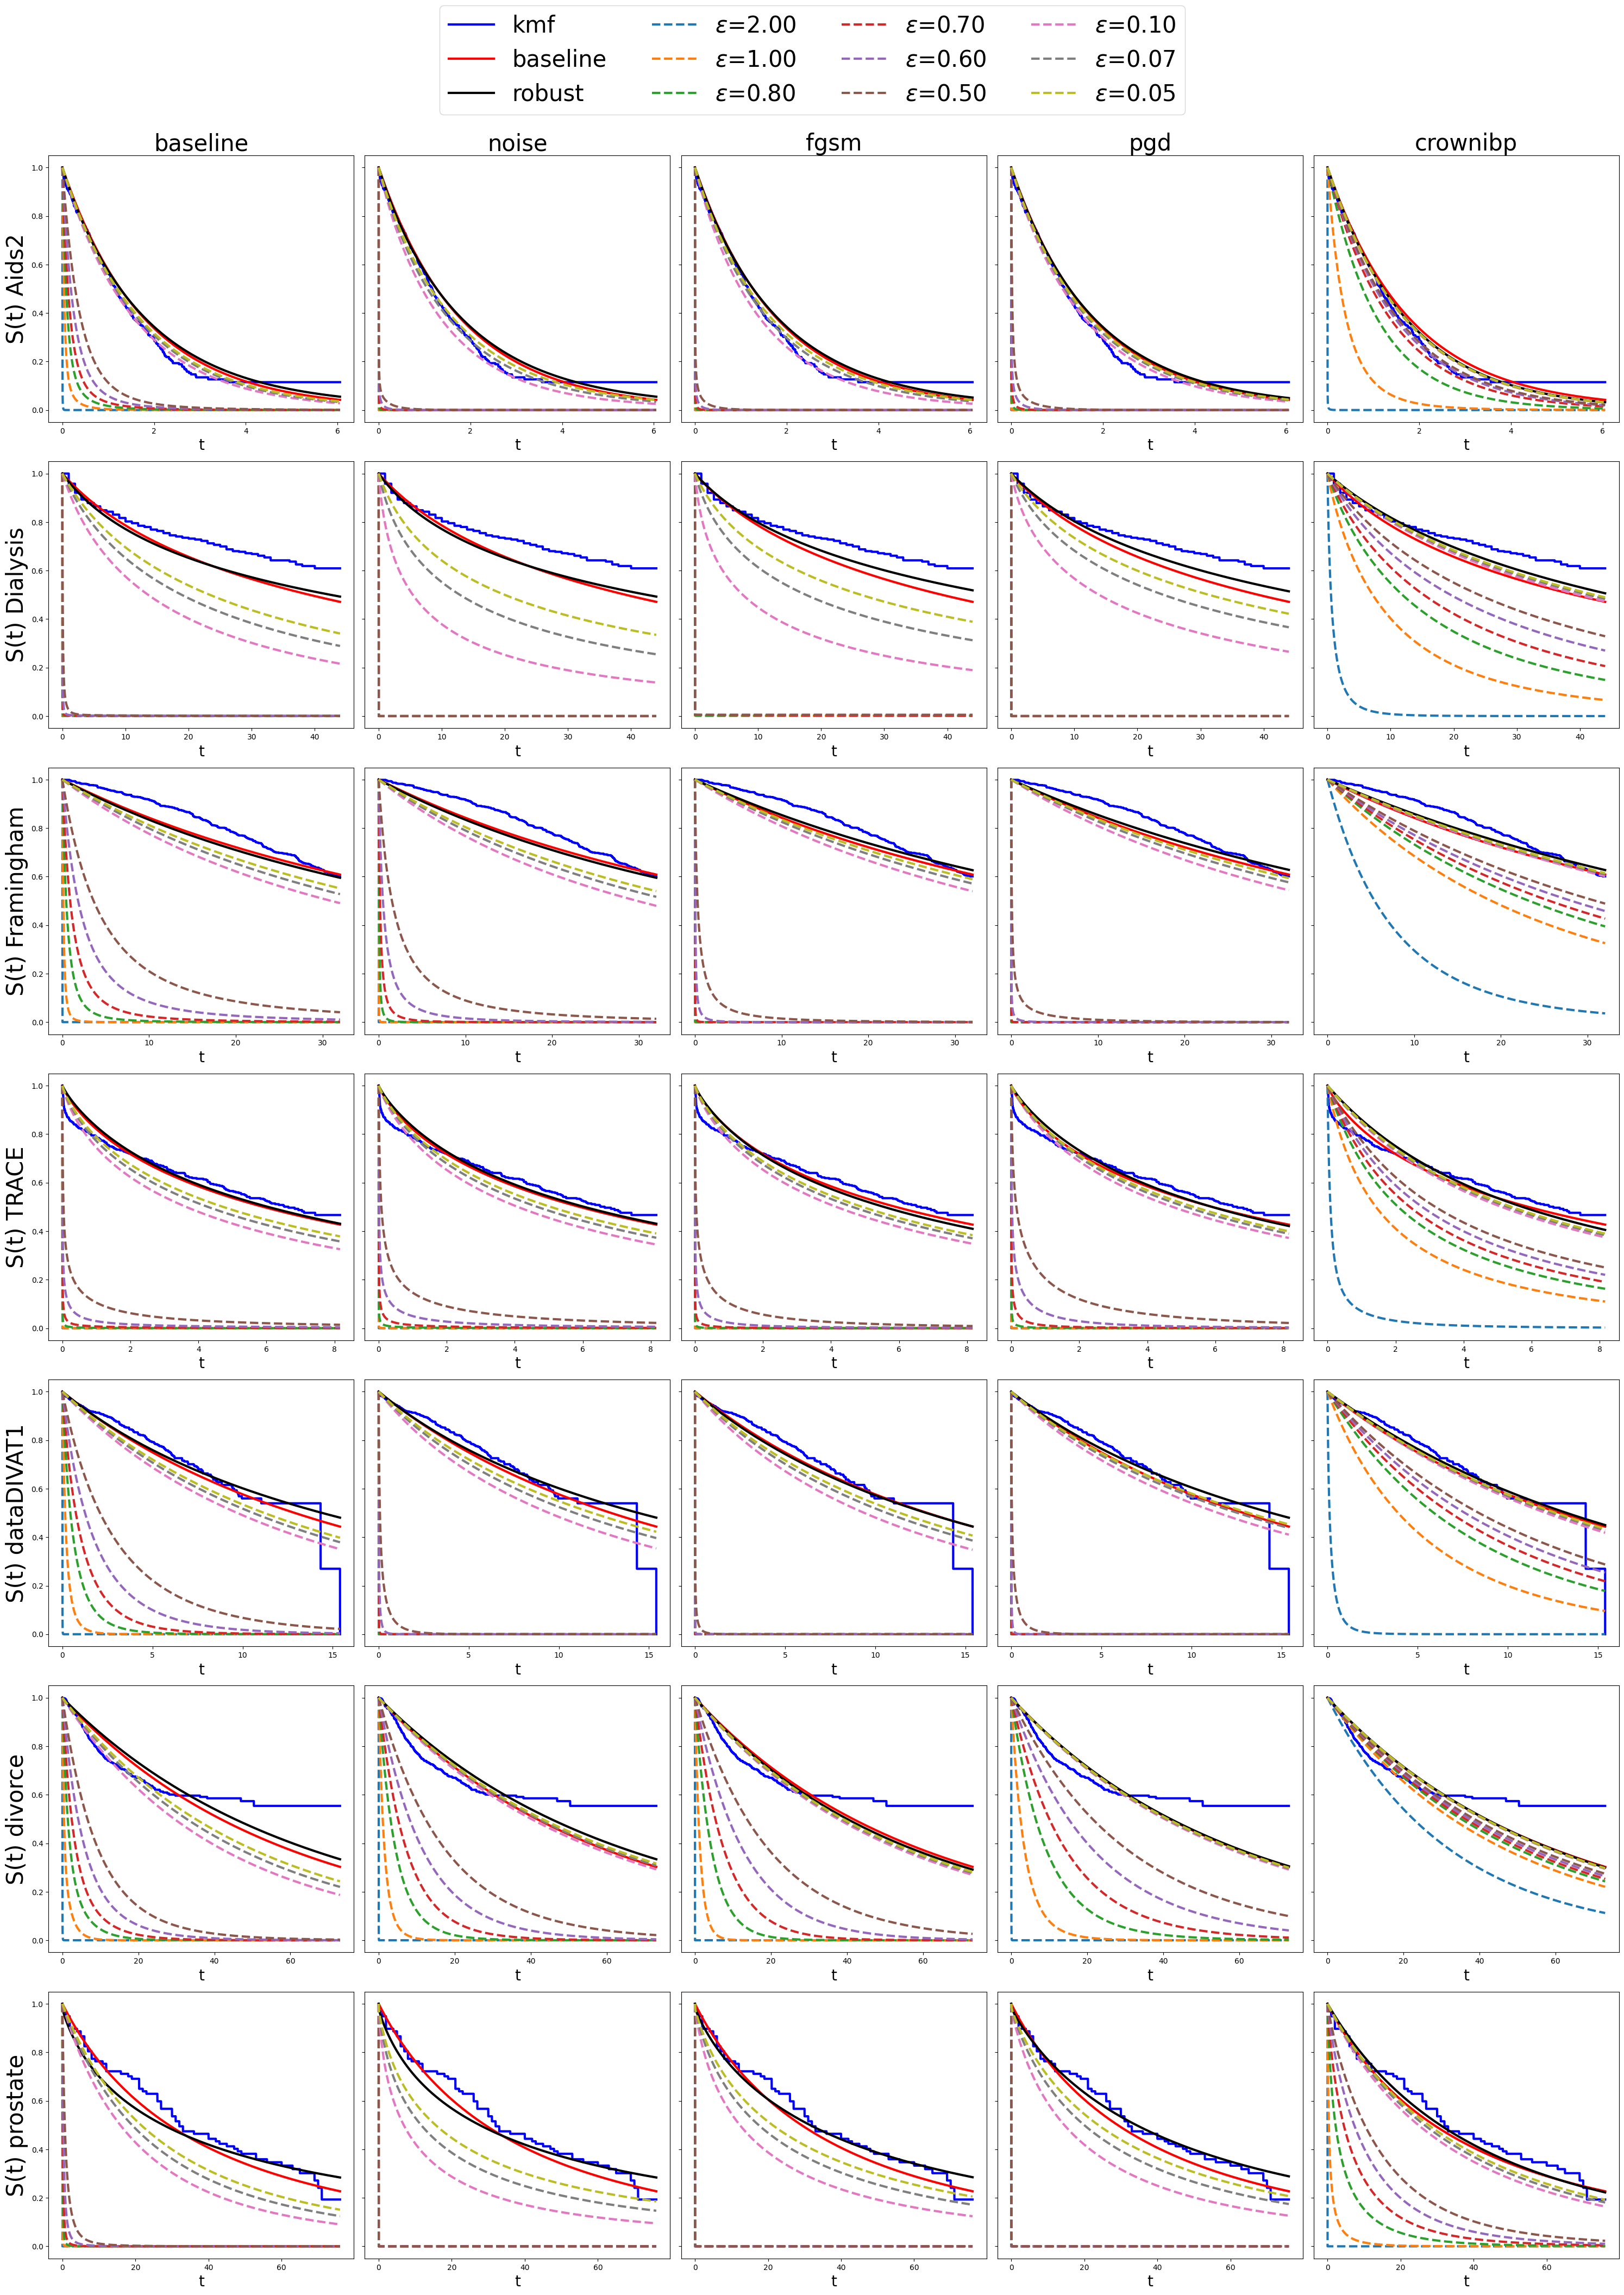

In [62]:
save_folder = results_folder = os.path.join(r"C:\Users\lpott\OneDrive\Documents\Northeastern University\Classes\EECE 7398 Verifiable Machine Learning\EECE7398_Final_Project\results",attack,"perturb_curves.pdf")

fig,axes = plt.subplots(n_rows,n_cols+1,figsize=(30,40),sharey=True)

SMALL_SIZE = 20
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)  

for i in range(n_rows):
    for j in range(n_cols):
        print(i,j)
        fileij = files[i][j]
        algo,dataset = fileij.split("\\")[-3:-1]
        algo = re.sub("results_","",algo)

        df_population = pd.read_excel(fileij)

        t = df_population.pop("t")
        base_models = df_population.iloc[:,:3]
        base_models.columns = [col.split("_")[0] for col in base_models.columns]
        
        df_population= df_population.iloc[:,3:]

        robust_idx = ["robust" in col for col in df_population.columns]
        baseline_idx = ["baseline" in col for col in df_population.columns]
        robust_df = df_population.iloc[:,robust_idx]
        baseline_df = df_population.iloc[:,baseline_idx]
        
        robust_df.columns = ["$\epsilon$={:.2f}".format(eval(col.split("=")[1])) for col in robust_df.columns]
        baseline_df.columns = ["$\epsilon$={:.2f}".format(eval(col.split("=")[1])) for col in baseline_df.columns]
        
        base1 = axes[i][j+1].plot(t,base_models.iloc[:,0],linewidth=3,c="b")
        base2 = axes[i][j+1].plot(t,base_models.iloc[:,1],linewidth=3,c="r")
        base3 = axes[i][j+1].plot(t,base_models.iloc[:,2],linewidth=3,c="k")

  
        robust1 = axes[i][j+1].plot(t,robust_df,'--',linewidth=3)
  
        if j == 0:
            base1 = axes[i][j].plot(t,base_models.iloc[:,0],linewidth=3,c="b")
            base2 = axes[i][j].plot(t,base_models.iloc[:,1],linewidth=3,c="r")
            base3 = axes[i][j].plot(t,base_models.iloc[:,2],linewidth=3,c="k")
            baseline1 = axes[i][j].plot(t,baseline_df,'--',linewidth=3)

            axes[i][j].set_ylabel(f"S(t) {dataset}" ,fontsize=30)
            axes[i][j].set_xlabel("t",fontsize=20)

        axes[i][j+1].set_xlabel("t",fontsize=20)

for ax, col in zip(axes[0], algorithms):
    ax.set_title(col,fontsize=30)


labels = base_models.columns.tolist() + robust_df.columns.tolist()
fig.legend([base1, base2,base3,robust1], labels=labels, 
           loc="upper center",ncols=4,fontsize=30,bbox_to_anchor=(.5,1.06)) 

# axes[0][3].legend(base_models.columns.tolist() + robust_df.columns.tolist(),fontsize=20,ncol=2,loc=1)

# plt.legend(base_models.columns.tolist() + robust_df.columns.tolist(),loc='upper center',ncol=5)
plt.tight_layout()
plt.savefig(save_folder,dpi=1600,bbox_inches="tight")
plt.show()

In [ ]:
files[2:4,:]

0 0
0 1
0 2
0 3
1 0
1 1
1 2
1 3


C:\Users\lpott\AppData\Local\Temp\ipykernel_3828\2976595886.py:58: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend([base1, base2,base3,robust1], labels=labels,


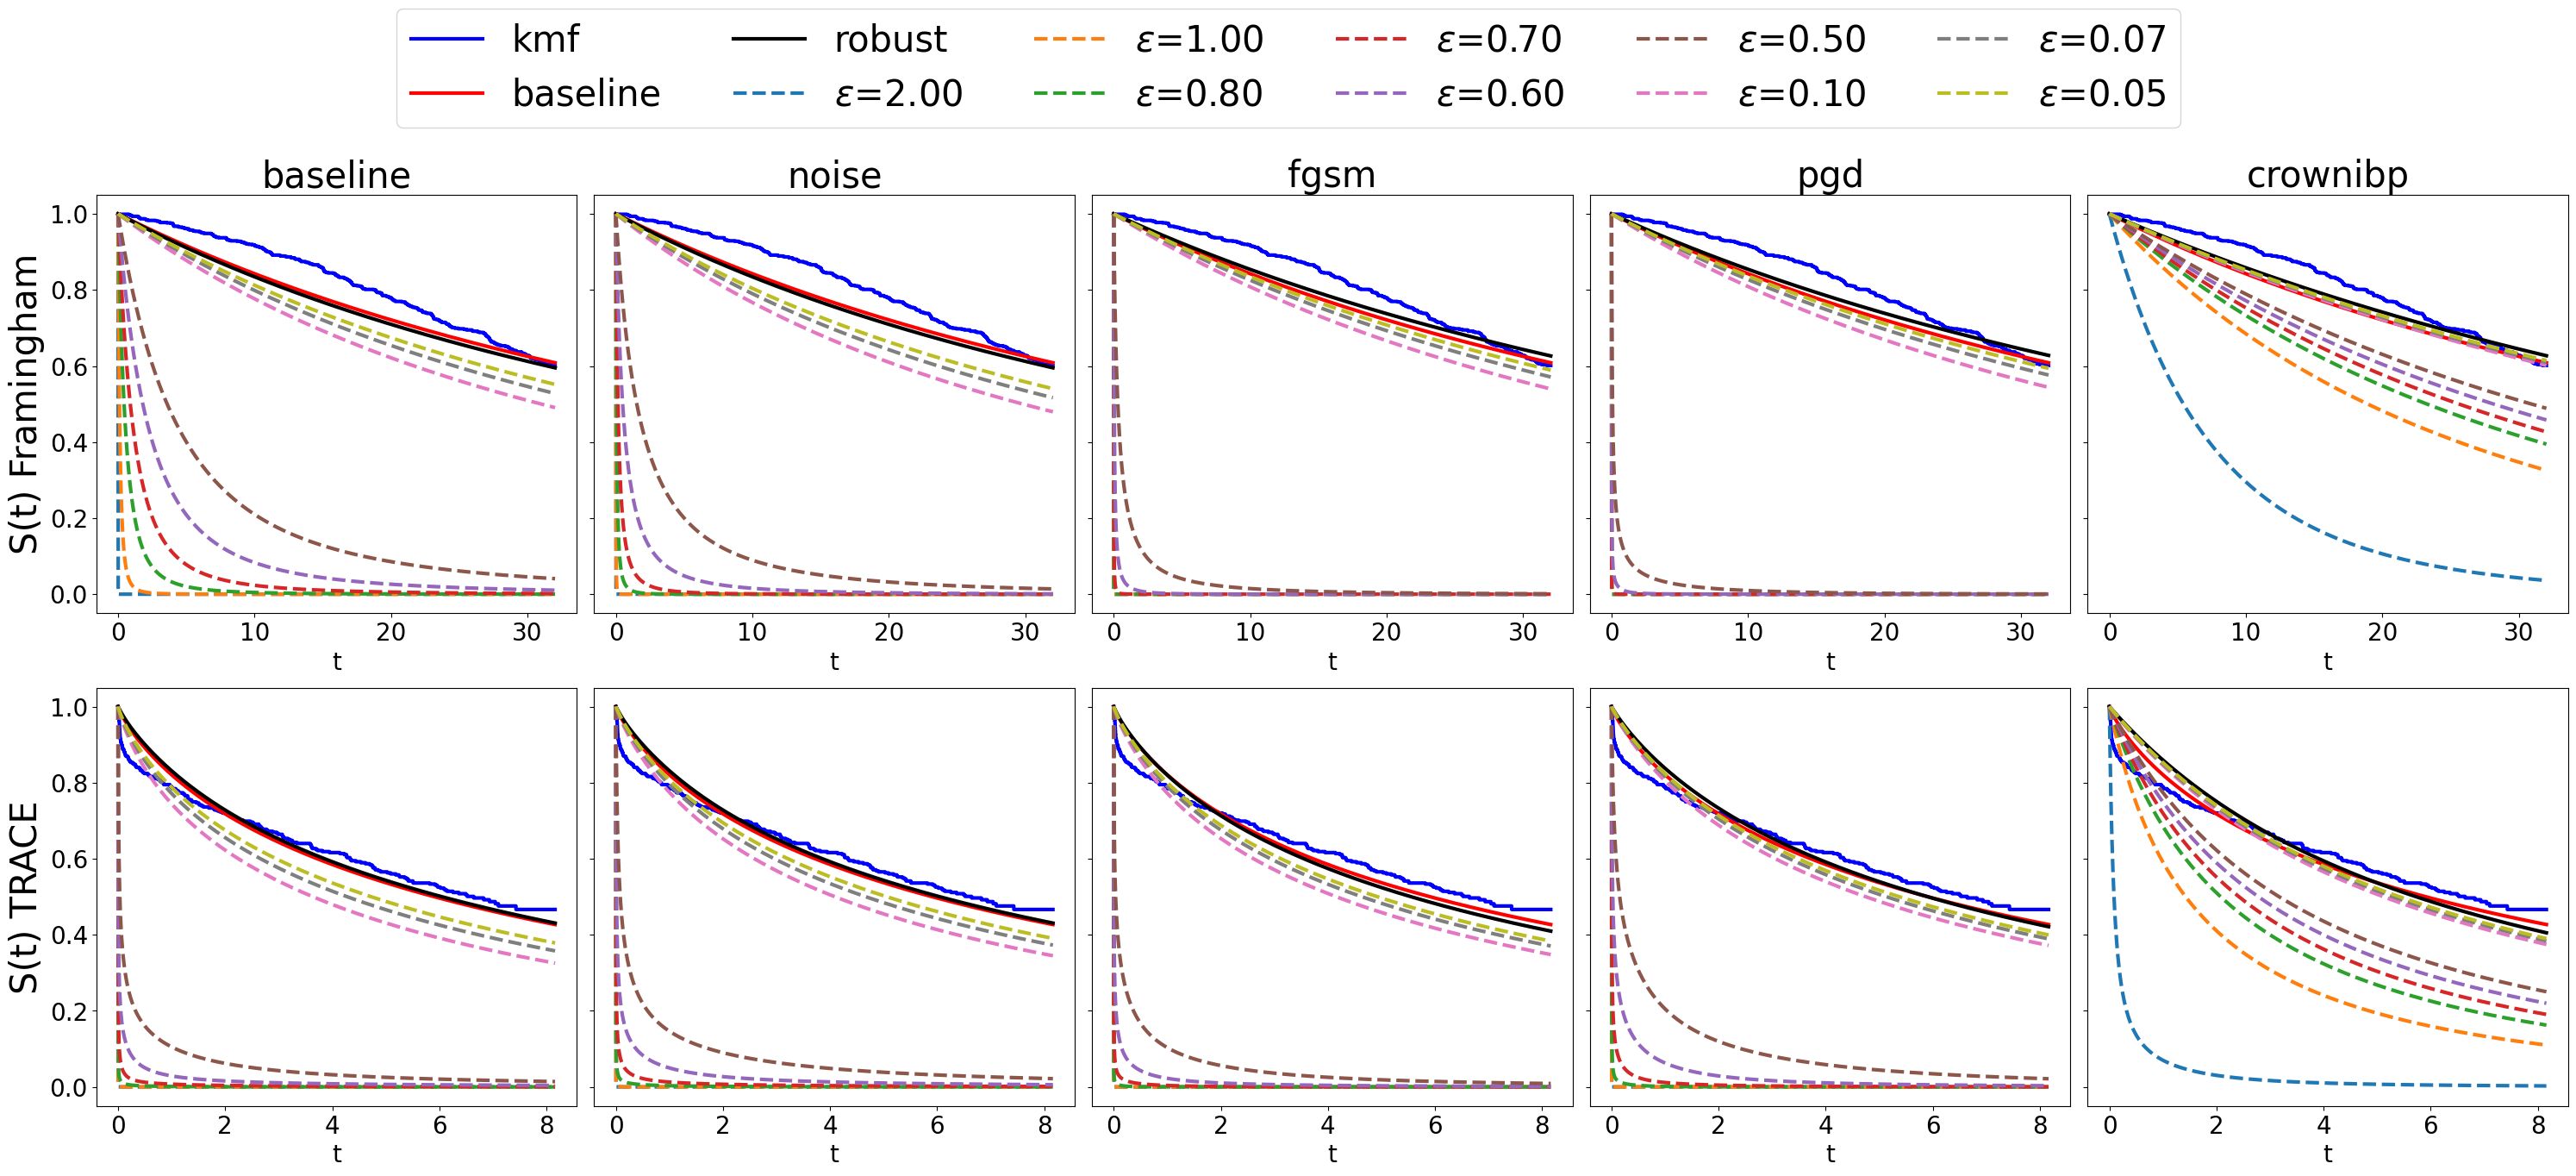

In [64]:
save_folder = results_folder = os.path.join(r"C:\Users\lpott\OneDrive\Documents\Northeastern University\Classes\EECE 7398 Verifiable Machine Learning\EECE7398_Final_Project\results",attack,"perturb_curves_subset.pdf")
file_subset = files[2:4,:]

fig,axes = plt.subplots(2,n_cols+1,figsize=(30,12),sharey=True)

SMALL_SIZE = 20
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)  

for i in range(2):
    for j in range(n_cols):
        print(i,j)
        fileij = file_subset[i][j]
        algo,dataset = fileij.split("\\")[-3:-1]
        if dataset not in ["TRACE","Framingham"]:
            continue
        algo = re.sub("results_","",algo)

        df_population = pd.read_excel(fileij)

        t = df_population.pop("t")
        base_models = df_population.iloc[:,:3]
        base_models.columns = [col.split("_")[0] for col in base_models.columns]
        
        df_population= df_population.iloc[:,3:]

        robust_idx = ["robust" in col for col in df_population.columns]
        baseline_idx = ["baseline" in col for col in df_population.columns]
        robust_df = df_population.iloc[:,robust_idx]
        baseline_df = df_population.iloc[:,baseline_idx]
        
        robust_df.columns = ["$\epsilon$={:.2f}".format(eval(col.split("=")[1])) for col in robust_df.columns]
        baseline_df.columns = ["$\epsilon$={:.2f}".format(eval(col.split("=")[1])) for col in baseline_df.columns]
        
        base1 = axes[i][j+1].plot(t,base_models.iloc[:,0],linewidth=3,c="b")
        base2 = axes[i][j+1].plot(t,base_models.iloc[:,1],linewidth=3,c="r")
        base3 = axes[i][j+1].plot(t,base_models.iloc[:,2],linewidth=3,c="k")

  
        robust1 = axes[i][j+1].plot(t,robust_df,'--',linewidth=3)
  
        if j == 0:
            base1 = axes[i][j].plot(t,base_models.iloc[:,0],linewidth=3,c="b")
            base2 = axes[i][j].plot(t,base_models.iloc[:,1],linewidth=3,c="r")
            base3 = axes[i][j].plot(t,base_models.iloc[:,2],linewidth=3,c="k")
            baseline1 = axes[i][j].plot(t,baseline_df,'--',linewidth=3)

            axes[i][j].set_ylabel(f"S(t) {dataset}" ,fontsize=30)
            axes[i][j].set_xlabel("t",fontsize=20)

        axes[i][j+1].set_xlabel("t",fontsize=20)

for ax, col in zip(axes[0], algorithms):
    ax.set_title(col,fontsize=30)


labels = base_models.columns.tolist() + robust_df.columns.tolist()
fig.legend([base1, base2,base3,robust1], labels=labels, 
           loc="upper center",ncols=6,fontsize=30,bbox_to_anchor=(.5,1.15)) 

# axes[0][3].legend(base_models.columns.tolist() + robust_df.columns.tolist(),fontsize=20,ncol=2,loc=1)

# plt.legend(base_models.columns.tolist() + robust_df.columns.tolist(),loc='upper center',ncol=5)
plt.tight_layout()
plt.savefig(save_folder,dpi=1600,bbox_inches="tight")
plt.show()

### DIST PLOTS

In [65]:
# CI , IBS , NegLL
results_folder = fr"C:\Users\lpott\OneDrive\Documents\Northeastern University\Classes\EECE 7398 Verifiable Machine Learning\EECE7398_Final_Project\results\{attack}"
img_name = "curve_distributions_test"

 # aggregate all the CI files
os.listdir(results_folder)
excels = []
for folder in os.listdir(results_folder):
    glob_search = os.path.join(results_folder,folder,"*",f"{img_name}.xlsx")
    excels.extend(glob.glob(glob_search))

In [66]:
excels = np.sort(excels)
files = pd.DataFrame(excels.reshape(-1,len(algorithms)-1,order="F"),columns=["crownibp","fgsm","noise","pgd"]).reindex(["noise","fgsm","pgd","crownibp"],axis=1).values

In [67]:
save_folder = results_folder = os.path.join(r"C:\Users\lpott\OneDrive\Documents\Northeastern University\Classes\EECE 7398 Verifiable Machine Learning\EECE7398_Final_Project\results",attack,"dist_curves.pdf")

In [68]:
import seaborn as sns

0 0
0 1
0 2
0 3
1 0
1 1
1 2
1 3
2 0
2 1
2 2
2 3
3 0
3 1
3 2
3 3
4 0
4 1
4 2
4 3
5 0
5 1
5 2
5 3
6 0
6 1
6 2
6 3


C:\Users\lpott\AppData\Local\Temp\ipykernel_3828\629479649.py:52: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend([mu,q95,q05], labels=labels,


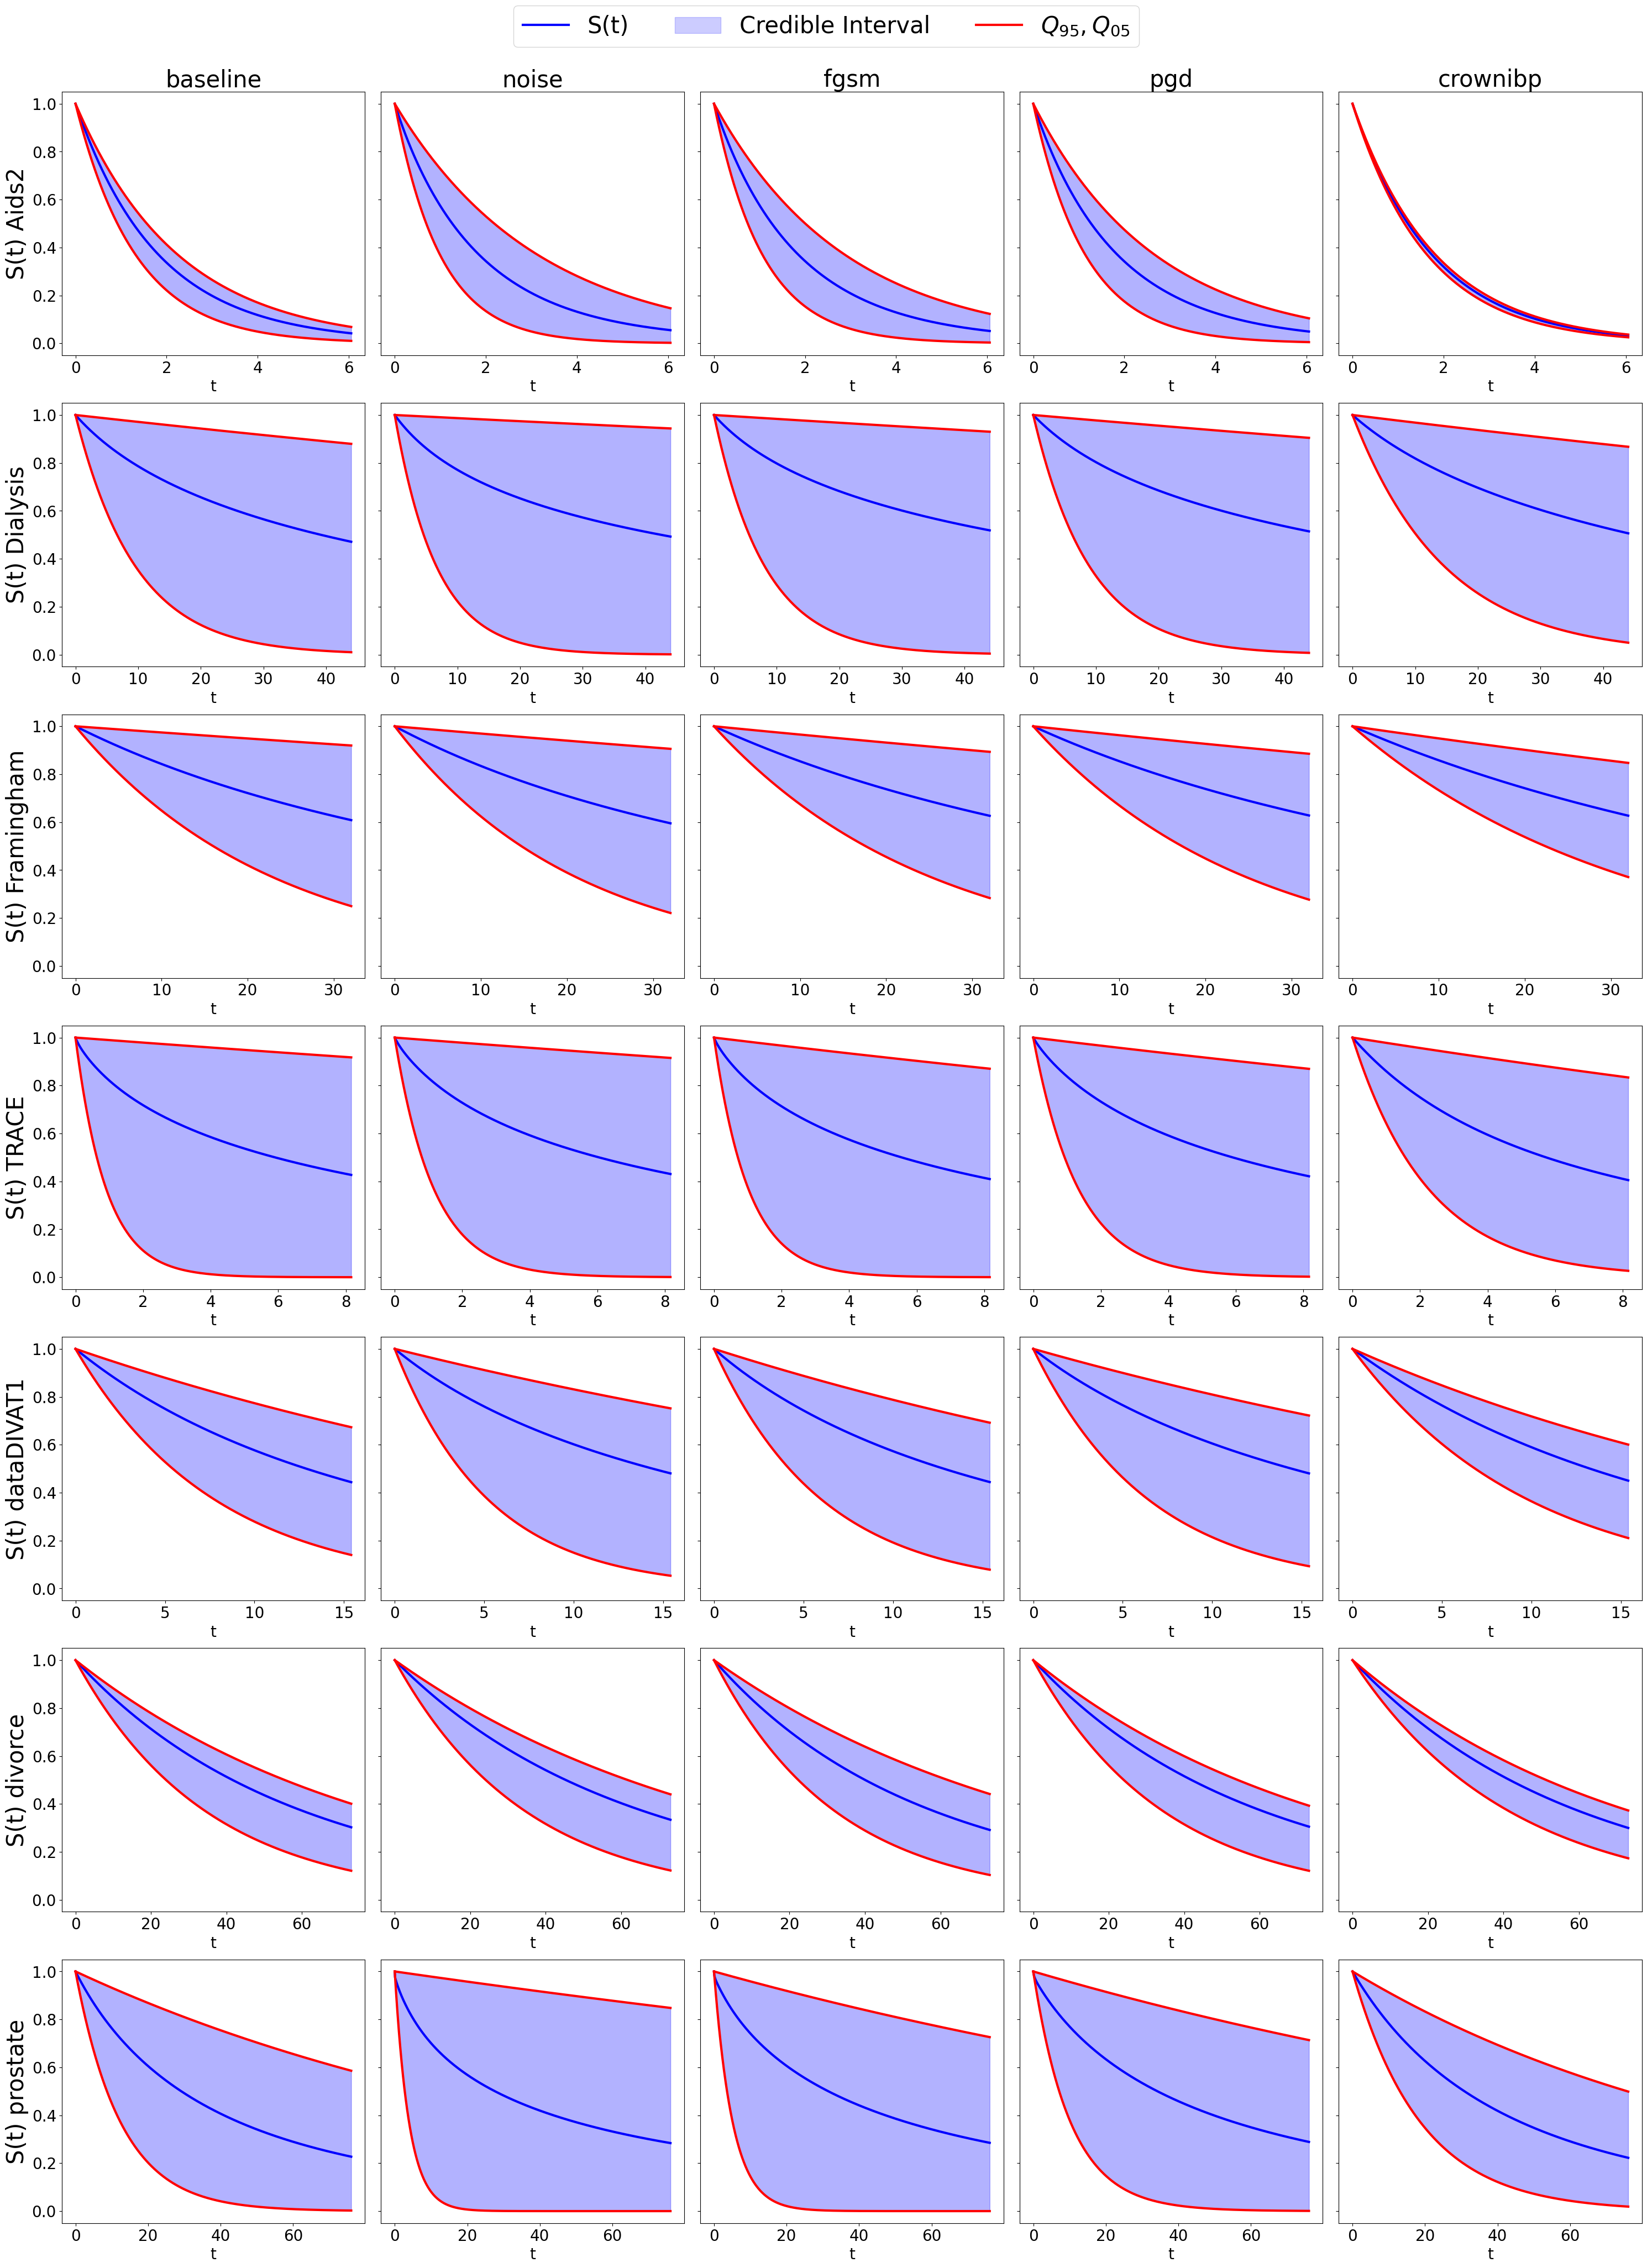

In [69]:
fig,axes = plt.subplots(n_rows,n_cols+1,figsize=(30,40),sharey=True)

SMALL_SIZE = 20
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)  

for i in range(n_rows):
    for j in range(n_cols):
        print(i,j)
        fileij = files[i][j]
        algo,dataset = fileij.split("\\")[-3:-1]
        algo = re.sub("results_","",algo)

        df_population = pd.read_excel(fileij)

        t = df_population.pop("t")
        base_models = df_population.iloc[:,:3]
        base_models.columns = [col.split("_")[0] for col in base_models.columns]
        
        robust_idx = ["robust" in col for col in df_population.columns]
        baseline_idx = ["baseline" in col for col in df_population.columns]
        robust_df = df_population.iloc[:,robust_idx]
        baseline_df = df_population.iloc[:,baseline_idx]
        
        robust_df.columns = [col.split("_")[1] for col in robust_df.columns]
        baseline_df.columns =[col.split("_")[1] for col in baseline_df.columns]
        
        mu = sns.lineplot(x=t, y=robust_df.iloc[:,0], label='Average S(t)', linewidth=3.0, ax=axes[i][j+1],c='b',legend=False)
        q95 = sns.lineplot(x=t, y=robust_df.iloc[:,1], label='Confidence', linewidth=3.0, ax=axes[i][j+1],c='r',legend=False)
        q05 = sns.lineplot(x=t, y=robust_df.iloc[:,2], label='Confidence', linewidth=3.0, ax=axes[i][j+1],c='r',legend=False)

        line = q05.get_lines()
        axes[i][j+1].fill_between(line[0].get_xdata(), line[1].get_ydata(), line[2].get_ydata(), color='blue', alpha=.3)
        axes[i][j+1].set_xlabel("t",fontsize=20)

        if j == 0:
            mu = sns.lineplot(x=t, y=baseline_df.iloc[:,0], label='Average S(t)', linewidth=3.0, ax=axes[i][j],c='b',legend=False)
            q95 = sns.lineplot(x=t, y=baseline_df.iloc[:,1], label='Confidence', linewidth=3.0, ax=axes[i][j],c='r',legend=False)
            q05 = sns.lineplot(x=t, y=baseline_df.iloc[:,2], label='Confidence', linewidth=3.0, ax=axes[i][j],c='r',legend=False)

            axes[i][j].set_ylabel(f"S(t) {dataset}" ,fontsize=30)
            axes[i][j].set_xlabel("t",fontsize=20)
            line = q05.get_lines()
            axes[i][j].fill_between(line[0].get_xdata(), line[1].get_ydata(), line[2].get_ydata(), color='blue', alpha=.3)
            axes[i][j].set_xlabel("t",fontsize=20)

for ax, col in zip(axes[0], algorithms):
    ax.set_title(col,fontsize=30)


labels = ["S(t)","Credible Interval","$Q_{95},Q_{05}$"]
fig.legend([mu,q95,q05], labels=labels, 
           loc="upper center",ncols=4,fontsize=30,bbox_to_anchor=(.5,1.03)) 

plt.tight_layout()
plt.savefig(save_folder,dpi=1600,bbox_inches="tight")
plt.show()

0 0
0 1
0 2
0 3
1 0
1 1
1 2
1 3


C:\Users\lpott\AppData\Local\Temp\ipykernel_3828\1773436218.py:54: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend([mu,q95,q05], labels=labels,


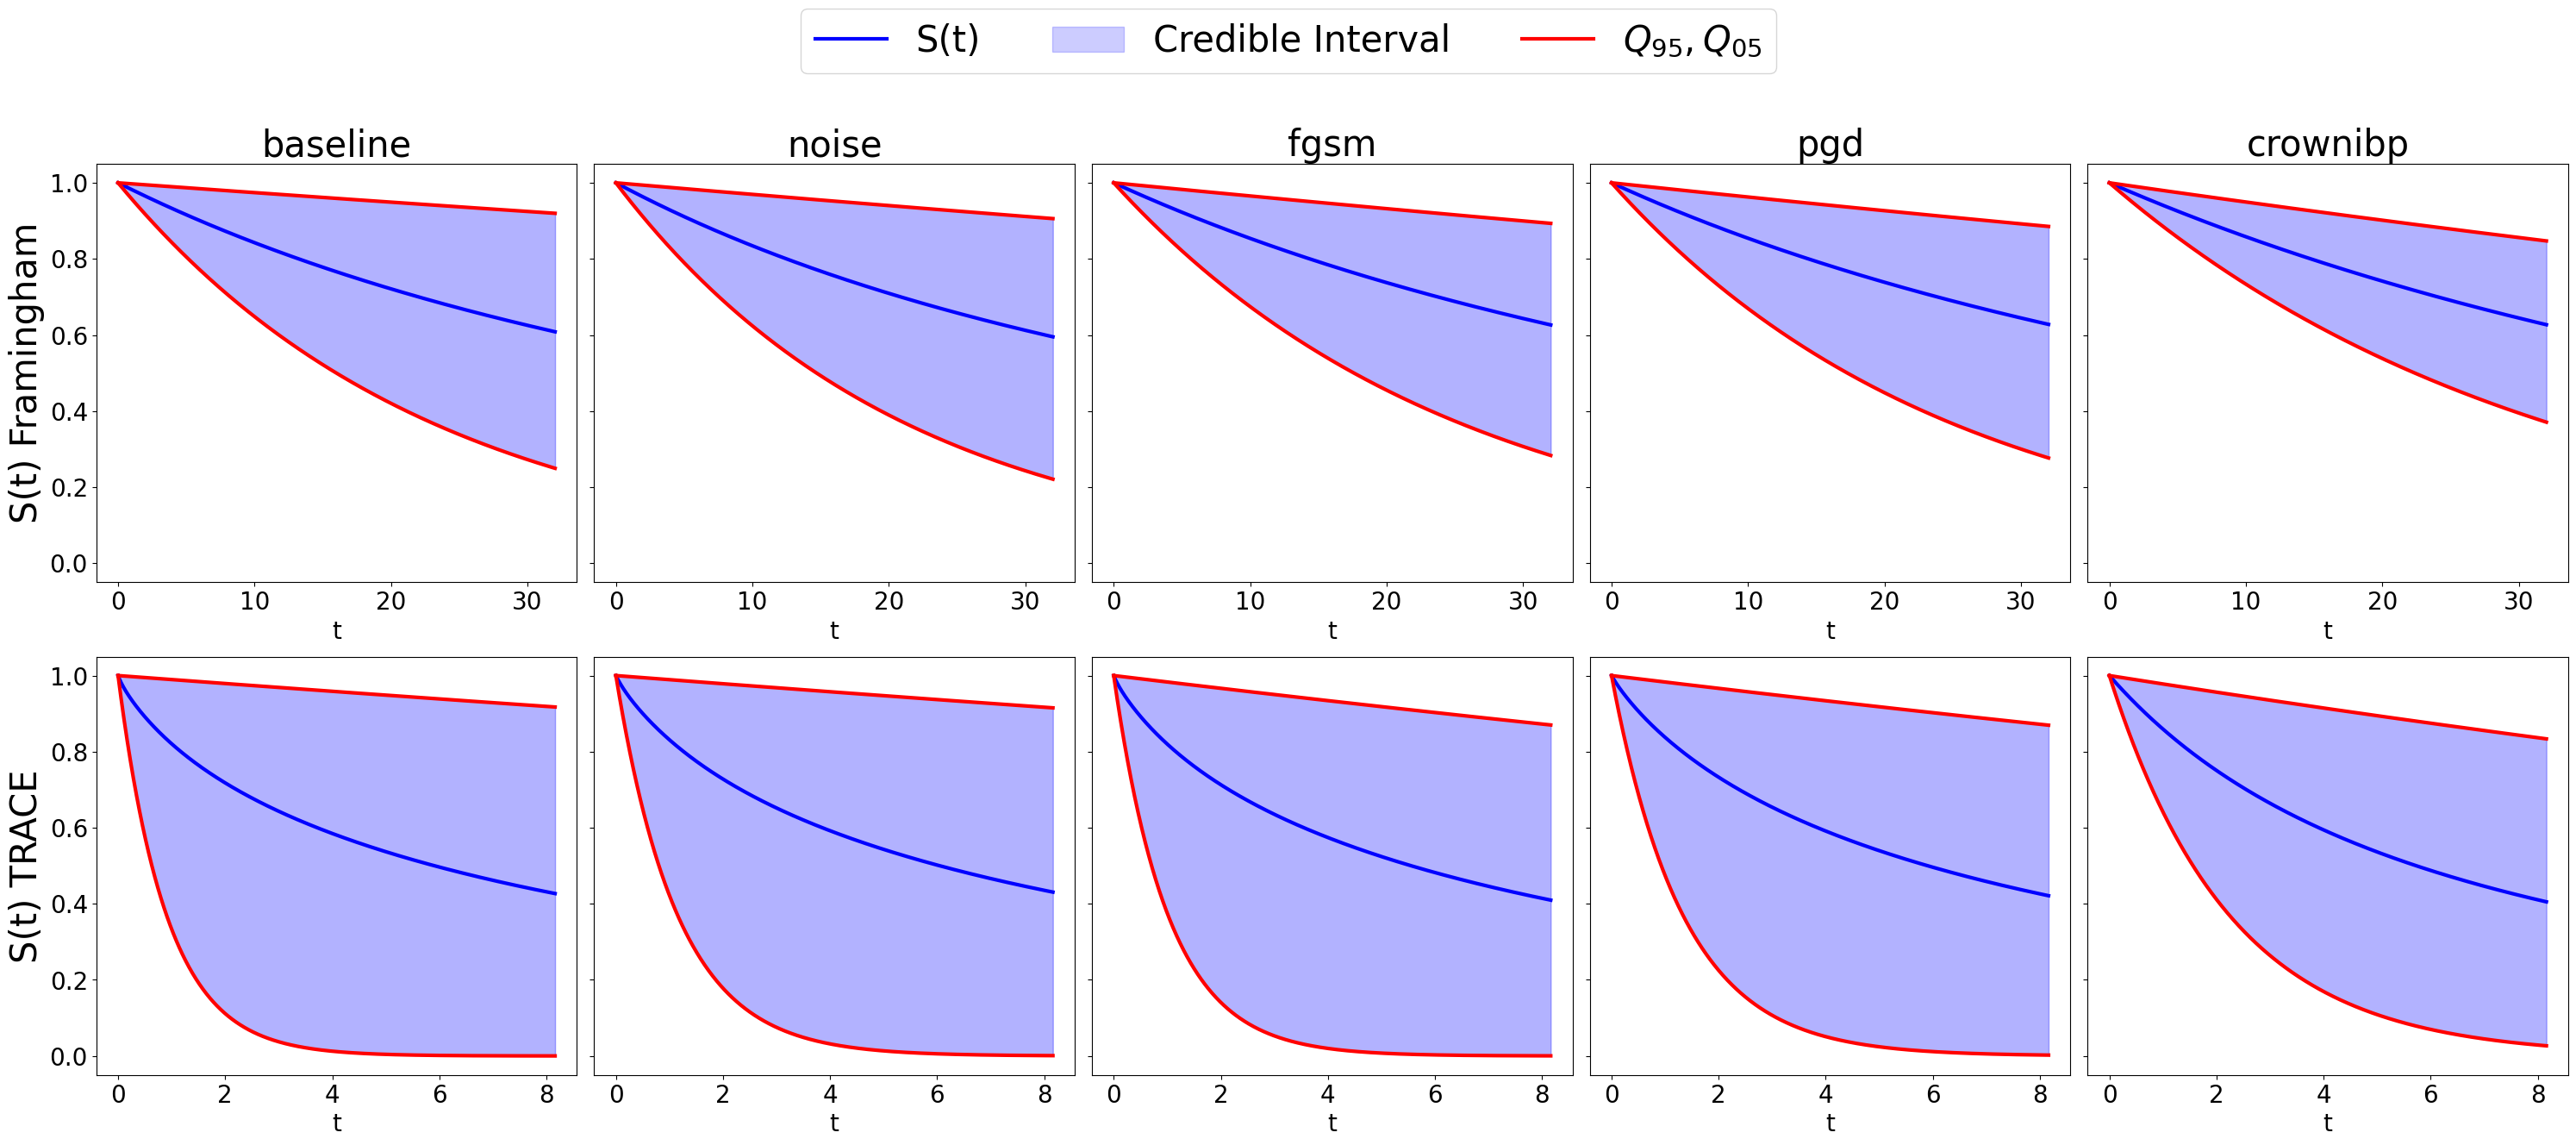

In [71]:
save_folder = results_folder = os.path.join(r"C:\Users\lpott\OneDrive\Documents\Northeastern University\Classes\EECE 7398 Verifiable Machine Learning\EECE7398_Final_Project\results",attack,"dist_curves_subset.pdf")
file_subset = files[2:4,:]

fig,axes = plt.subplots(2,n_cols+1,figsize=(30,12),sharey=True)

SMALL_SIZE = 20
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)  

for i in range(2):
    for j in range(n_cols):
        print(i,j)
        fileij = file_subset[i][j]
        algo,dataset = fileij.split("\\")[-3:-1]
        algo = re.sub("results_","",algo)

        df_population = pd.read_excel(fileij)

        t = df_population.pop("t")
        base_models = df_population.iloc[:,:3]
        base_models.columns = [col.split("_")[0] for col in base_models.columns]
        
        robust_idx = ["robust" in col for col in df_population.columns]
        baseline_idx = ["baseline" in col for col in df_population.columns]
        robust_df = df_population.iloc[:,robust_idx]
        baseline_df = df_population.iloc[:,baseline_idx]
        
        robust_df.columns = [col.split("_")[1] for col in robust_df.columns]
        baseline_df.columns =[col.split("_")[1] for col in baseline_df.columns]
        
        mu = sns.lineplot(x=t, y=robust_df.iloc[:,0], label='Average S(t)', linewidth=3.0, ax=axes[i][j+1],c='b',legend=False)
        q95 = sns.lineplot(x=t, y=robust_df.iloc[:,1], label='Confidence', linewidth=3.0, ax=axes[i][j+1],c='r',legend=False)
        q05 = sns.lineplot(x=t, y=robust_df.iloc[:,2], label='Confidence', linewidth=3.0, ax=axes[i][j+1],c='r',legend=False)
        axes[i][j+1].set_xlabel("t",fontsize=20)

        line = q05.get_lines()
        axes[i][j+1].fill_between(line[0].get_xdata(), line[1].get_ydata(), line[2].get_ydata(), color='blue', alpha=.3)
        if j == 0:
            mu = sns.lineplot(x=t, y=baseline_df.iloc[:,0], label='Average S(t)', linewidth=3.0, ax=axes[i][j],c='b',legend=False)
            q95 = sns.lineplot(x=t, y=baseline_df.iloc[:,1], label='Confidence', linewidth=3.0, ax=axes[i][j],c='r',legend=False)
            q05 = sns.lineplot(x=t, y=baseline_df.iloc[:,2], label='Confidence', linewidth=3.0, ax=axes[i][j],c='r',legend=False)

            axes[i][j].set_ylabel(f"S(t) {dataset}" ,fontsize=30)
            axes[i][j].set_xlabel("t",fontsize=20)
            line = q05.get_lines()
            axes[i][j].fill_between(line[0].get_xdata(), line[1].get_ydata(), line[2].get_ydata(), color='blue', alpha=.3)
            axes[i][j].set_xlabel("t",fontsize=20)

for ax, col in zip(axes[0], algorithms):
    ax.set_title(col,fontsize=30)


labels = ["S(t)","Credible Interval","$Q_{95},Q_{05}$"]
fig.legend([mu,q95,q05], labels=labels, 
           loc="upper center",ncols=4,fontsize=30,bbox_to_anchor=(.5,1.12)) 

plt.tight_layout()
plt.savefig(save_folder,dpi=1600,bbox_inches="tight")
plt.show()